# Unsupervised Learning

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import holidays
import plotly.express as px
from datetime import date
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

## Load Data

In [ ]:
df2 = pd.read_csv('dataset.csv')
df2

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


## Preprocess Variables

1. Remove unnecessary variables
2. Normalize in [0.0, 1.0]

In [ ]:
drop_columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre']
df2_dropped=df2[drop_columns]
df2_stripped = df2.drop(columns=drop_columns)

normalizer = MinMaxScaler()
df2_stripped = normalizer.fit_transform(df2_stripped)


## Apply K-Means Clustering

> Add blockquote



In [ ]:
# Restore column names
df2_stripped = pd.DataFrame(df2_stripped, columns=df2.drop(columns=drop_columns).columns)

#Apply K-Means clustering with k=9
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(df2_stripped)

#Add cluster labels to the DataFrame
df2_stripped['cluster'] = kmeans.labels_

#Check the first few rows and the count of each cluster
print(df2_stripped.head())
print(df2_stripped['cluster'].value_counts())

   popularity  duration_ms  explicit  danceability  energy       key  \
0        0.73     0.044043       0.0      0.686294  0.4610  0.090909   
1        0.55     0.028566       0.0      0.426396  0.1660  0.090909   
2        0.57     0.040255       0.0      0.444670  0.3590  0.000000   
3        0.71     0.038557       0.0      0.270051  0.0596  0.000000   
4        0.82     0.037969       0.0      0.627411  0.4430  0.181818   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0  0.791392   0.0     0.148187      0.032329          0.000001    0.3580   
1  0.597377   1.0     0.079067      0.927711          0.000006    0.1010   
2  0.736123   1.0     0.057720      0.210843          0.000000    0.1170   
3  0.573701   1.0     0.037617      0.908635          0.000071    0.1320   
4  0.737103   1.0     0.054508      0.470884          0.000000    0.0829   

    valence     tempo  time_signature  cluster  
0  0.718593  0.361245             0.8        5  
1  0.268342 

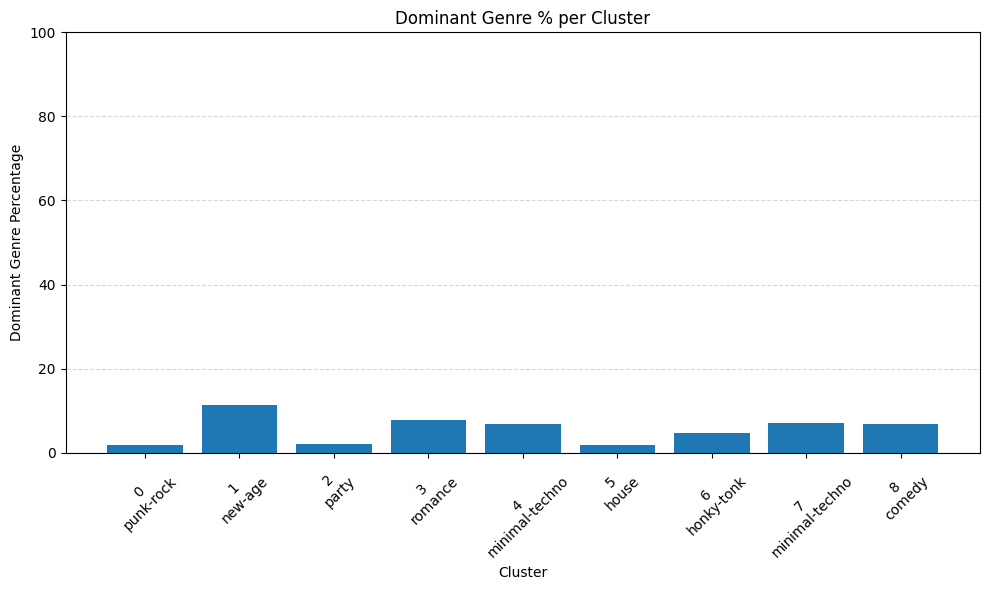

In [ ]:
# Prepare genre info
df2_stripped['track_genre'] = df2_dropped['track_genre']

# Get dominant genre and percentage for each cluster
dominant = {}
for c in sorted(df2_stripped['cluster'].unique()):
    genres = df2_stripped[df2_stripped['cluster'] == c]['track_genre']
    top_genre = genres.value_counts().idxmax()
    percent = genres.value_counts(normalize=True).max() * 100
    dominant[c] = (top_genre, percent)

# Plot using cluster number as x-axis
clusters = list(dominant.keys())
percentages = [v[1] for v in dominant.values()]
genres = [v[0] for v in dominant.values()]

plt.figure(figsize=(10, 6))
bars = plt.bar(clusters, percentages)
plt.xlabel("Cluster")
plt.ylabel("Dominant Genre Percentage")
plt.title("Dominant Genre % per Cluster")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show genre names on x-axis with rotation
plt.xticks(clusters, [f"{c}\n{g}" for c, g in zip(clusters, genres)], rotation=45)

plt.tight_layout()
plt.show()


## Select a Song

Select a known song to you, or select and listen a random song. Then, plot its attributes (from the original dataset).

In [ ]:
song_index = 71682  # Change this index as needed
selected_song = df2_stripped.iloc[song_index]
print("Selected song:", df2_dropped.iloc[song_index]['artists'] + " - " + df2_dropped.iloc[song_index]['track_name'], end="")
print(" (cluster: " + str(int(df2_stripped.iloc[song_index]['cluster'])) + ")")

Selected song: Iron Maiden - The Number of the Beast - 2015 Remaster (cluster: 0)


## Find Top-10 Songs

Find the 10 most similar songs. Listen to the selected songs and suggest whether they are similar to the selected song. Then, print a table with their attributes.

In [ ]:
# Remove 'cluster' column if it exists
features = df2_stripped.drop(columns=['cluster'], errors='ignore')

# Compute distances from the selected song
dist = cdist(features.values, [features.values[song_index]], metric='euclidean').flatten()
dist[song_index] = 0  # set distance to itself as 0

# Add distances to the DataFrame
df2_stripped['distance'] = dist

# Get 10 closest songs (excluding itself)
top_similar = df2_stripped.sort_values('distance').head(11).tail(10)

# Show track names and distances
print(top_similar.merge(df2[['track_name']], left_index=True, right_index=True)[['track_name', 'distance']])


                                     track_name  distance
71682   The Number of the Beast - 2015 Remaster  0.000000
47158      For Whom The Bell Tolls - Remastered  0.198505
71318      For Whom The Bell Tolls - Remastered  0.198505
83259                                      Safe  0.202392
37755                                By the Way  0.209317
2957                                 By the Way  0.209317
71615                                By the Way  0.209317
113015                Raise a Hallelujah - Live  0.210337
4134                  Raise a Hallelujah - Live  0.210337
71589                              Bag of Grins  0.218376


## Recommended songs


In [ ]:
i=1
for song in top_similar.index[:3]:
    print(str(i) + ":", df2_dropped.loc[song, 'artists'] + " - " + df2_dropped.loc[song, 'track_name'], end="")
    print(" (cluster: " + str(int(df2_stripped.loc[song, 'cluster'])) + ")")
    i+=1


1: Iron Maiden - The Number of the Beast - 2015 Remaster (cluster: 0)
2: Metallica - For Whom The Bell Tolls - Remastered (cluster: 0)
3: Metallica - For Whom The Bell Tolls - Remastered (cluster: 0)


## 🔎 Results & Evaluation

The recommended tracks are indeed relevant to the one we selected.  
- The first recommendation is another version of the same track, which is expected since it does not differ significantly from the original.  
- The next two recommendations are alternative versions of a well-known Metallica song, which also appear to be suitable matches.
